In [1]:
import pandas as pd

In [2]:
pa = pd.read_csv('Property_Price_Train.csv')

In [3]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [4]:
print(pa.shape)
print(pa.isnull().sum())

(1459, 81)
Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 81, dtype: int64


In [5]:
pa.isnull().sum()*100/pa.shape[0]

Id                 0.000000
Building_Class     0.000000
Zoning_Class       0.000000
Lot_Extent        17.751885
Lot_Size           0.000000
                    ...    
Month_Sold         0.000000
Year_Sold          0.000000
Sale_Type          0.000000
Sale_Condition     0.000000
Sale_Price         0.000000
Length: 81, dtype: float64

In [6]:
pd.set_option('display.max_columns',100)

In [7]:
pd.set_option('display.max_rows',10000)

In [8]:
pa.columns[pa.isnull().sum()*100/pa.shape[0]>40]

Index(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],
      dtype='object')

In [9]:
pa.columns[pa.isnull().sum()*100/pa.shape[0]>40]

Index(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],
      dtype='object')

In [64]:
pa=pa.drop(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],axis=1)

In [65]:
pa.Basement_Height.fillna('TA' , inplace = True)
pa.Exposure_Level.fillna('No' , inplace = True)
pa.BsmtFinType1.fillna('Unf' , inplace = True)
pa.BsmtFinType2.fillna('Unf' , inplace = True)
pa.Electrical_System.fillna('SBrkr' , inplace = True)
pa.Garage.fillna('Attchd' , inplace = True)
pa.Garage_Finish_Year.fillna('Unf' , inplace = True)
pa.Garage_Quality.fillna('TA' , inplace = True)
pa.Garage_Condition.value_counts()
pa.Basement_Condition.fillna('TA' , inplace = True)

In [66]:
pa.Lot_Extent=pa.Lot_Extent.fillna(pa.Lot_Extent.mean())

In [67]:
pa.Brick_Veneer_Type=pa.Brick_Veneer_Type.fillna("None")

In [68]:
pa.Brick_Veneer_Area=pa.Brick_Veneer_Area.fillna(pa.Brick_Veneer_Area.mean())

In [69]:
pa.Garage_Built_Year=pa.Garage_Built_Year.fillna(pa.Garage_Built_Year.mean())

In [70]:
pa.Garage_Condition=pa.Garage_Condition.fillna("TA")

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
pa[pa.select_dtypes(include=['object']).columns]=pa[pa.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [72]:
from sklearn.model_selection import train_test_split
pa_train,pa_test=train_test_split(pa, test_size=.2)

In [73]:
pa_train_x=pa_train.iloc[:,0:-1]
pa_train_y=pa_train.iloc[:,-1]

In [74]:
pa_test_x=pa_test.iloc[:,0:-1]
pa_test_y=pa_test.iloc[:,-1]

In [75]:
pa_train_x.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
1296,1297,20,3,80.000000,8700,1,3,3,0,4,0,12,2,2,0,2,5,6,1963,1963,3,4,8,8,1,148.0,3,2,1,3,3,2,0,776,5,0,344,1120,1,2,1,4,1128,0,0,1128,1,0,2,0,3,1,3,6,7,0,2,1963.0,1,2,221.407185,4,4,2,45.638431,111.897662,-42.291545,0,0,0,0,12,2008,8,4
338,339,20,3,91.000000,14145,1,3,3,0,0,0,14,2,2,0,2,7,7,1984,1998,1,4,13,14,2,0.0,2,4,1,2,3,2,0,213,5,0,995,1208,1,0,1,4,1621,0,0,1621,1,0,2,0,3,1,2,8,7,0,2,1984.0,1,2,309.679116,4,4,2,194.010521,170.153544,-84.435850,0,0,0,400,5,2006,8,4
548,549,20,4,49.000000,8235,1,0,1,0,4,0,17,1,7,0,2,5,7,1955,1995,1,4,8,8,2,0.0,3,2,1,3,3,3,3,180,4,645,0,825,1,4,1,4,825,0,0,825,1,0,1,0,2,1,3,4,7,0,6,1963.0,1,2,584.453188,4,4,2,204.717444,43.579845,16.800635,0,0,0,0,6,2008,8,4
1022,1023,50,4,52.000000,9439,1,3,3,0,4,0,17,2,2,0,0,5,5,1930,1950,1,4,13,14,2,0.0,3,4,1,3,3,3,3,324,5,0,588,912,1,2,1,0,912,336,0,1248,0,0,1,0,2,1,3,6,7,0,6,1957.0,2,1,674.414759,1,1,2,208.512730,88.138500,-18.341042,0,0,0,0,3,2007,8,4
1443,1444,30,3,70.045833,8854,1,3,3,0,4,0,3,2,2,0,1,6,6,1916,1950,1,4,13,14,2,0.0,3,4,0,3,3,3,5,0,5,0,952,952,3,1,0,1,952,0,0,952,0,0,1,0,2,1,1,4,7,1,6,1916.0,2,1,687.408810,1,3,1,344.216463,37.025132,69.280683,0,40,0,0,5,2009,8,4


In [76]:
from sklearn.linear_model import LinearRegression

reg_pa = LinearRegression()

In [77]:
reg_pa.fit(pa_train_x, pa_train_y)

LinearRegression()

In [78]:
pred_train  = reg_pa.predict(pa_train_x)
pred_test = reg_pa.predict(pa_test_x)

In [79]:
Rsquare = reg_pa.score(pa_train_x, pa_train_y)
Rsquare

0.8505682085912785

In [80]:
N = pa_train_x.shape[0]
K = pa_train_x.shape[1]

Adj_Rsquare = 1-(1-Rsquare) * (N-1)/(N-K-1)

In [81]:
Adj_Rsquare

0.8402956289802298

In [82]:
reg_pa.intercept_

1315983.6483051172

In [83]:
reg_pa.coef_

array([-1.56646587e+00, -1.39013332e+02, -2.74043181e+03, -1.41277994e+02,
        2.50637084e-01,  3.38906073e+04, -6.17334973e+02,  3.71254178e+03,
        2.41951028e-08, -4.81265581e+02,  1.18670727e+04,  3.27587373e+02,
       -7.66553718e+02, -8.96490477e+03, -1.66746085e+03, -1.85772169e+03,
        1.12523793e+04,  3.95656449e+03,  1.69351499e+02,  8.89444500e+01,
        2.82461586e+03,  3.22666852e+04, -1.13708485e+03,  5.33298433e+02,
        5.43853065e+03,  3.56192047e+01, -1.08217935e+04, -3.02891194e+02,
        3.44823253e+02, -1.02804661e+04,  3.79771164e+03, -4.29984960e+03,
       -2.21508910e+02,  5.59765683e+00,  8.83048571e+02,  1.11735199e+01,
       -6.87398401e+00,  9.89719279e+00, -4.41265805e+03, -8.79124100e+02,
        7.37927863e+01, -7.85520334e+01,  1.24627432e+01,  2.28732734e+01,
       -1.18023710e+01,  2.35336457e+01,  5.99403635e+03, -7.85003828e+02,
        3.90447712e+03, -2.12964156e+03, -3.57469869e+03, -9.20005960e+03,
       -7.19417325e+03,  

In [84]:
column_coef = pd.DataFrame({'Columns': pa_train_x.columns,'Coeficents':reg_pa.coef_})

In [85]:
column_coef.sort_values('Coeficents', ascending=False)

,Columns,Coeficents
5,Road_Type,3.389061e+04
21,Roof_Quality,3.226669e+04
10,Property_Slope,1.186707e+04
16,Overall_Material,1.125238e+04
59,Garage_Size,1.083294e+04
55,Fireplaces,6.782126e+03
46,Underground_Full_Bathroom,5.994036e+03
24,Brick_Veneer_Type,5.438531e+03
17,House_Condition,3.956564e+03
48,Full_Bathroom_Above_Grade,3.904477e+03


In [86]:
error_train = pa_train_y - pred_train
error_test = pa_test_y - pred_test

In [87]:
error_train.mean()

-1.6359993812868302e-11

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

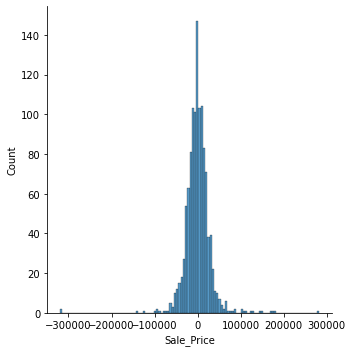

In [89]:
sns.displot(error_train)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
          3.,   9.,  42., 159., 406., 369., 124.,  27.,   8.,   3.,   4.,
          2.,   2.,   2.,   1.,   0.,   0.,   0.,   1.]),
 array([-319128.32561905, -299115.38486689, -279102.44411473,
        -259089.50336258, -239076.56261042, -219063.62185826,
        -199050.68110611, -179037.74035395, -159024.79960179,
        -139011.85884963, -118998.91809748,  -98985.97734532,
         -78973.03659316,  -58960.09584101,  -38947.15508885,
         -18934.21433669,    1078.72641546,   21091.66716762,
          41104.60791978,   61117.54867194,   81130.48942409,
         101143.43017625,  121156.37092841,  141169.31168056,
         161182.25243272,  181195.19318488,  201208.13393703,
         221221.07468919,  241234.01544135,  261246.95619351,
         281259.89694566]),
 <BarContainer object of 30 artists>)

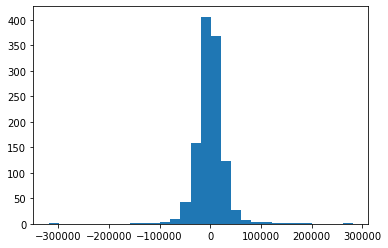

In [90]:
plt.hist(error_train, bins = 30)

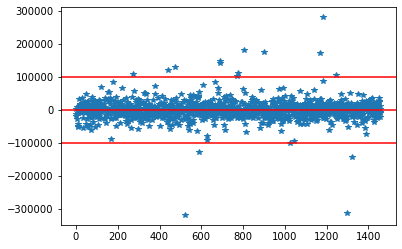

In [91]:
plt.plot(error_train,'*') # scatter Plot
plt.axhline(y = error_train.mean(), color = 'r')
plt.axhline(y = 100000, color = 'r')
plt.axhline(y = -100000, color = 'r')

In [92]:
pred_actual = pd.DataFrame({'Pred':pred_train, 'Actual':pa_train_y})

In [93]:
pred_actual

,Pred,Actual
1296,149076.812508,155000
338,227907.303800,202500
548,80121.376649,125000
1022,104418.148107,87000
1443,106097.217857,121000
1192,141533.640995,125000
1096,110360.682030,127000
446,201997.893570,190000
246,172045.794258,137000
371,104945.990584,134432


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

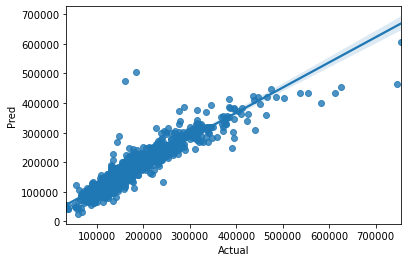

In [94]:
sns.regplot(pred_actual.Actual, pred_actual.Pred)

In [95]:
import numpy as np

In [96]:
MAE = np.mean(np.abs(pred_test))
MAE

180532.74498670964

In [97]:
MSE = np.mean(np.square(error_test))
MSE

812803931.7208195

In [98]:
RMSE = np.sqrt(MSE)
RMSE

28509.716444062004

In [99]:
MAPE = np.mean(np.abs(error_test * 100/pa_test_y))
MAPE

12.441458111787155

In [100]:
ACC = 100 - MAPE
ACC

87.55854188821284

In [101]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [106]:
# score_dtree = cross_val_score(lin, pa_train_x, pa_train_y, cv= 10, scoring='Recall')